In [39]:
#mount googledrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [47]:
import torch, torchvision

from pathlib import Path
import numpy as np
import cv2
import csv
import pandas as pd
from tqdm import tqdm
import PIL.Image as Image
import seaborn as sns
from pylab import rcParams
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MaxNLocator
from torch.optim import lr_scheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from glob import glob
import shutil
from collections import defaultdict
import time
import random

from torch import nn, optim

import torch.nn.functional as F
import torchvision.transforms as T
from torchvision import datasets, models, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import models
import os

import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian

In [22]:
import torch.nn as nn
class TransferNet_4(nn.Module):
    def __init__(self):
        super(TransferNet_4, self).__init__()
        self.name = "TransferNet"
        self.layer1 = nn.Linear(256 * 6 * 6, 3072)
        self.layer2 = nn.Linear(3072, 1024) 
        self.layer3 = nn.Linear(1024, 256) 
        self.layer4 = nn.Linear(256, 43) 
    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6)
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = self.layer4(x)
        return x

#Load Best Model AlexNet

In [23]:
#############################################Load Best Model
model_save_name = 'AlexNet_new.pt'
path = F"/content/gdrive/MyDrive/APS360-Team24/Traffic-Sign-Recognization/TrainedModel/{model_save_name}"

model = TransferNet()
model.load_state_dict(torch.load(path))

<All keys matched successfully>

#Load Label

In [24]:
root_path = '/content/gdrive/My Drive/APS360-Team24/Traffic-Sign-Recognization/Dataset/GTSRB/'
lable_name = root_path + "label_names.csv"
print(lable_name)
sign_names = pd.read_csv(lable_name)
classLabels = list(sign_names["SignName"])
classIndex = list(sign_names["ClassId"])
print(len(classLabels))
print(len(classIndex))
classLabels_new = sorted(classLabels)

/content/gdrive/My Drive/APS360-Team24/Traffic-Sign-Recognization/Dataset/GTSRB/label_names.csv
43
43


In [14]:
classLabels_new

['Ahead only',
 'Beware of ice or snow',
 'Bicycles crossing',
 'Bumpy road',
 'Children crossing',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Double curve',
 'End of all speed and passing limits',
 'End of no passing',
 'End of no passing by vehicles over 3.5 metric tons',
 'End of speed limit (80kmh)',
 'General caution',
 'Go straight or left',
 'Go straight or right',
 'Keep left',
 'Keep right',
 'No entry',
 'No passing',
 'No passing for vehicles over 3.5 metric tons',
 'No vehicles',
 'Pedestrians',
 'Priority road',
 'Right-of-way at the next intersection',
 'Road narrows on the right',
 'Road work',
 'Roundabout mandatory',
 'Slippery road',
 'Speed limit (100kmh)',
 'Speed limit (120kmh)',
 'Speed limit (20kmh)',
 'Speed limit (30kmh)',
 'Speed limit (50kmh)',
 'Speed limit (60kmh)',
 'Speed limit (70kmh)',
 'Speed limit (80kmh)',
 'Stop',
 'Traffic signals',
 'Turn left ahead',
 'Turn right ahead',
 'Vehicles over 3.5 metric tons prohibited',
 'Wild 

In [15]:
alexnet = torchvision.models.alexnet(pretrained=True)

#Load Images

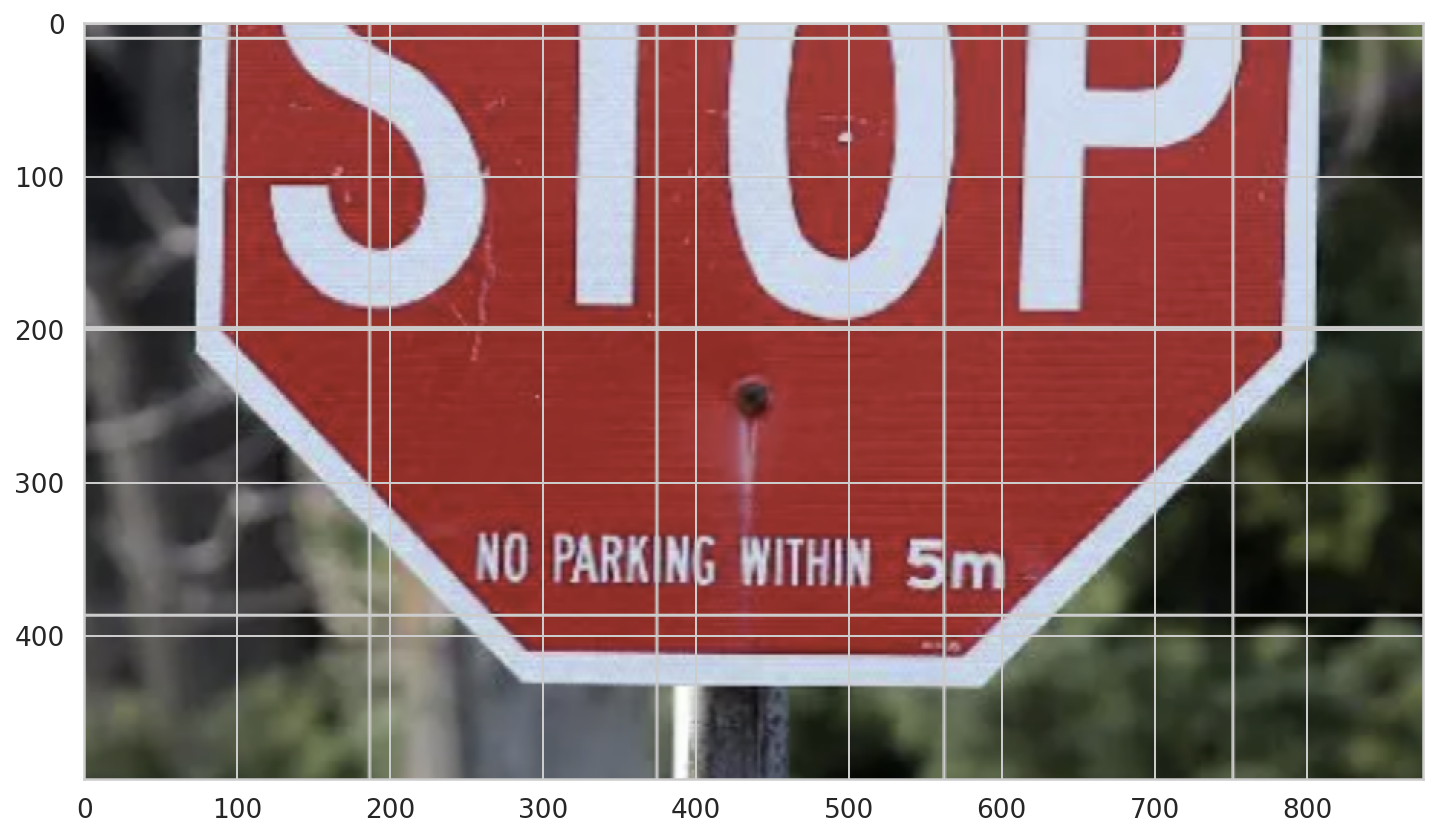

In [48]:
# img_path = '/content/gdrive/MyDrive/APS360-Team24/Traffic-Sign-Recognization/Test-Image/Report-Snow-1.png'
# img_path = '/content/gdrive/MyDrive/APS360-Team24/Traffic-Sign-Recognization/Test-Image/fog-testing.png'
img_path = '/content/gdrive/MyDrive/APS360-Team24/Traffic-Sign-Recognization/Test-Image/Half-Stop-Sign.png'
imgs = Image.open(img_path)
imgs = imgs.convert('RGB')
plt.imshow(imgs)

In [45]:
# mean_nums = [0.485, 0.456, 0.406]
# std_nums = [0.229, 0.224, 0.225]

# transform = transforms.Compose([transforms.Resize((224,224)),
#                                 transforms.ToPILImage(),
#                                 transforms.Normalize(mean_nums, std_nums),
#                                 transforms.ToTensor()])

transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

imgs = transform(imgs).unsqueeze(0)
imgs = alexnet.features(imgs)
imgs = imgs.cuda()
model.cuda()

output = model(imgs)
# pred = output.max(1, keepdim=True)[1]
pred = F.softmax(output, dim=1)
pred = pred.detach().cpu().numpy().flatten()

# output = model(imgs)
# pred = F.softmax(output, dim=1)
# pred = pred.detach().cpu().numpy().flatten()
print("pred =. ", pred)

pred =.  [0.0000000e+00 0.0000000e+00 4.2139732e-18 0.0000000e+00 3.2175965e-25
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.8184061e-28
 0.0000000e+00 0.0000000e+00 2.0159080e-41 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.4346968e-07
 2.3758234e-31 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 9.9999964e-01 0.0000000e+00 0.0000000e+00 5.5302146e-39
 0.0000000e+00 0.0000000e+00 4.4294335e-18]


#Show Prediction Labels and Probability

Prediction probability: 99.99996423721313%
Max index is: 36
Predict Traffic sign is: Stop


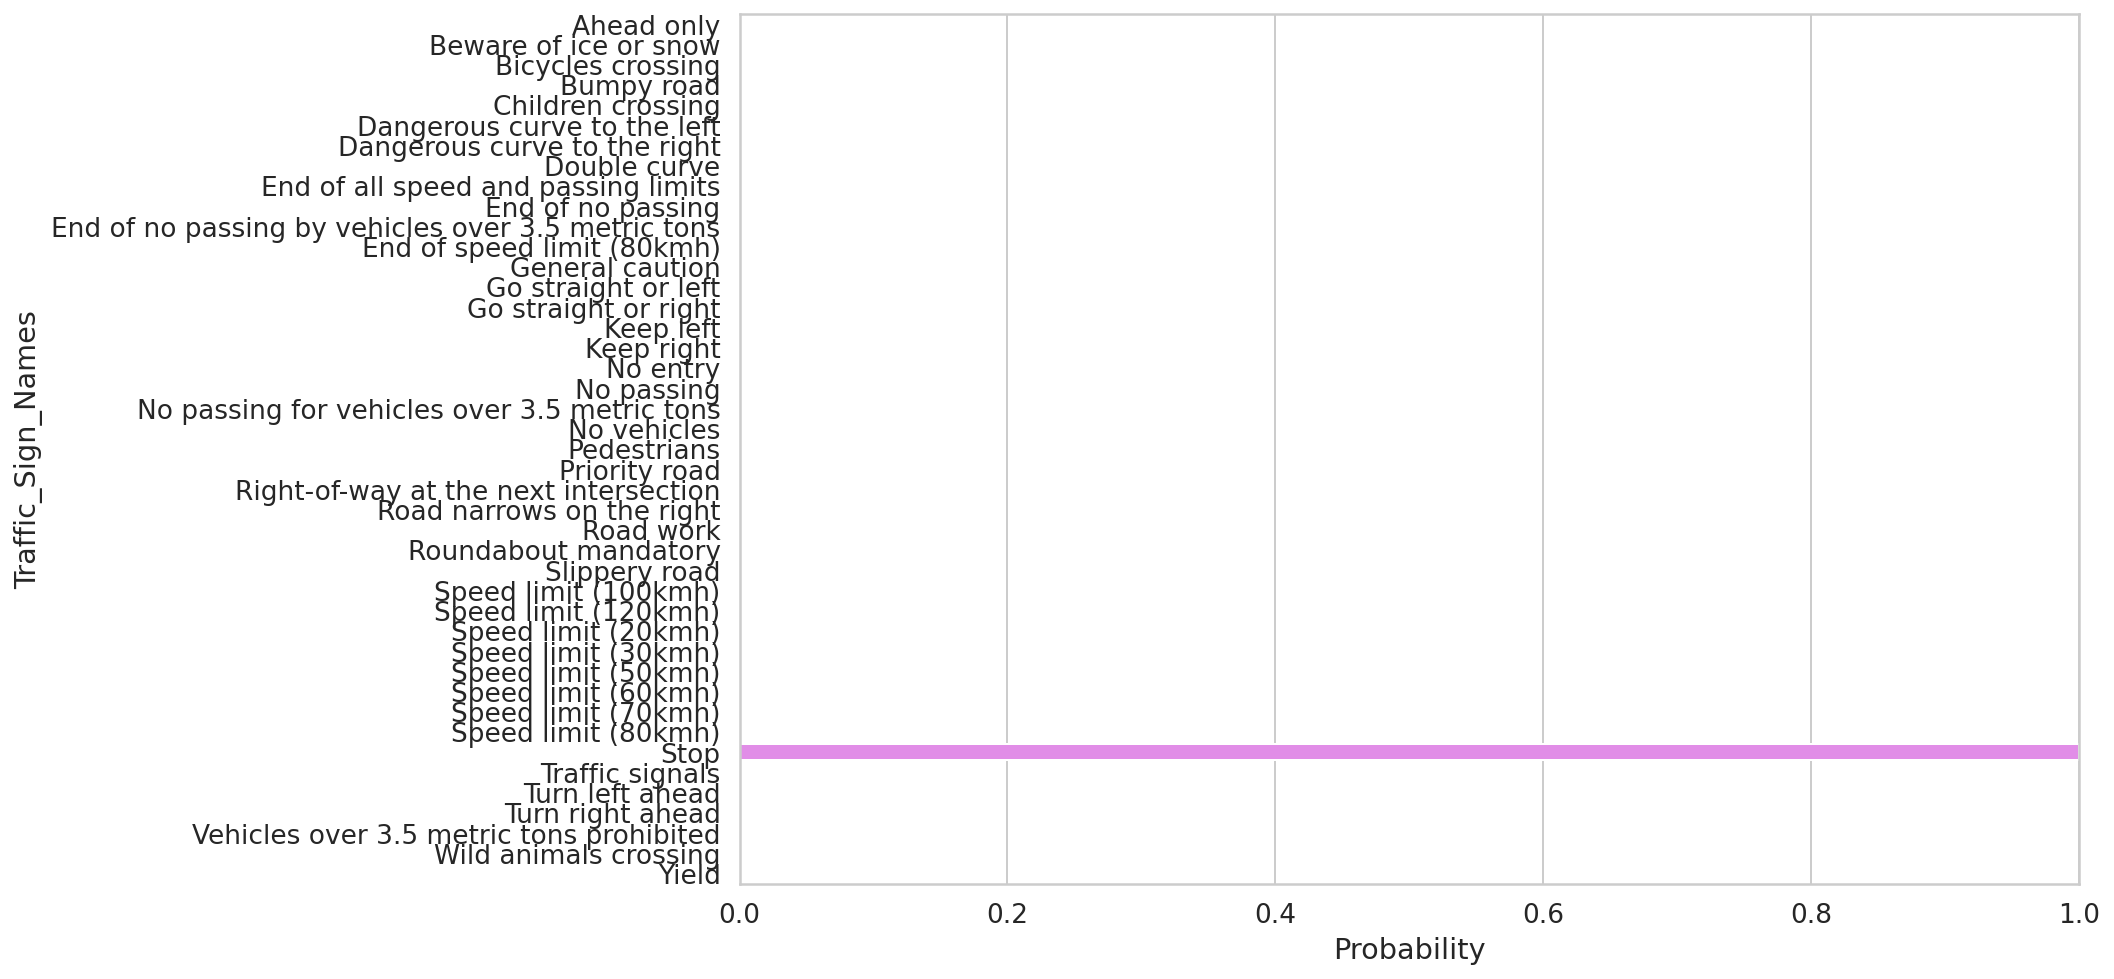

In [46]:
def show_prediction_confidence(prediction, class_names):
  pred_df = pd.DataFrame({
    'Traffic_Sign_Names': class_names,
    'Probability': prediction
  })
  sns.barplot(x='Probability', y='Traffic_Sign_Names', data=pred_df, orient='h')
  plt.xlim([0, 1]);


show_prediction_confidence(pred, classLabels_new)
pred_list = pred.tolist()
max_value = max(pred_list)
max_index = pred_list.index(max_value)
print("Prediction probability: {0}%".format(max_value * 100))
print("Max index is: {0}".format(max_index))

print("Predict Traffic sign is: {0}".format(classLabels_new[max_index]))